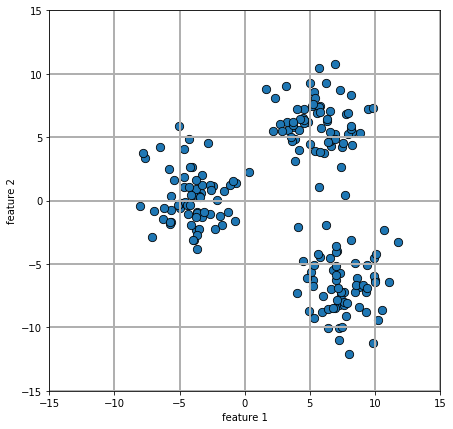

In [18]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import make_blobs # generating initial data
from copy import deepcopy
blobs_a = 200
centers_a = 3
clusters = 3
features = 2
seed = 26
accur = 0.0001 # centroid calculation accuracy
blobs, blobs_labels = make_blobs(n_samples = blobs_a,
                                 n_features = features, centers = centers_a,
                                 random_state = seed, cluster_std = 2)
plt.figure(figsize = (7,7))
plt.scatter(blobs[:,0], blobs[:,1], s = 70,
            edgecolors = 'black', linewidth = 0.8)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid(lw = 2)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.show()

# Реализация KMeans

In [2]:
def print_fig(blobs, corresp): # for visualization
    plt.figure(figsize = (7,7))
    plt.scatter(blobs[:,0], blobs[:,1], s = 70, c = corresp,
        edgecolors = 'black', linewidth = 0.8)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.grid(lw = 2)
    plt.xlim([-20, 20])
    plt.ylim([-20, 20])
    plt.show()

In [3]:
def fin_sign(centers, new_cent): # center convergency indicator
    diff = abs(centers - new_cent)
    return (diff.max() < accur)

In [4]:
def dst(blobs, centers): # distances calculation between centers and blobs
    distance = []
    sz = blobs[:,0].size
    for i in range(centers_a):
        dst_np = (blobs[:,0] - centers[i,0])**2
        if (sz != 1):
            for j in range(features-1):
                dst_np = dst_np + (blobs[:,j+1] - centers[i,j+1])**2
            dst_np = np.sqrt(dst_np)
        distance.append(dst_np)
    return distance

In [5]:
def corresp(blobs, centers): # correspondence between centers and blobs
    distance = np.array(dst(blobs, centers))
    sz = blobs[:,0].size
    res = []
    for i in range(sz):
        for j in range(centers_a):
            if (distance[:,i].min() == distance[j,i]):
                res.append(j+1)
                break
    return res

In [6]:
def cent_form(blobs, centers, clusters): # new centers formation
    new_cent = deepcopy(centers)
    sz = blobs[:,0].size
    for j in range(centers_a):
        for s in range(features):
            new_cent[j,s] = np.mean([blobs[k,s] for k in range(sz) if clusters[k] == (j+1)])
    for j in range(centers_a):
        if math.isnan(new_cent[j,0]):
            new_cent[j,:] = np.zeros(2)
            new_cent[j,:] = np.array([np.mean(new_cent),np.mean(new_cent)])
    return deepcopy(new_cent)

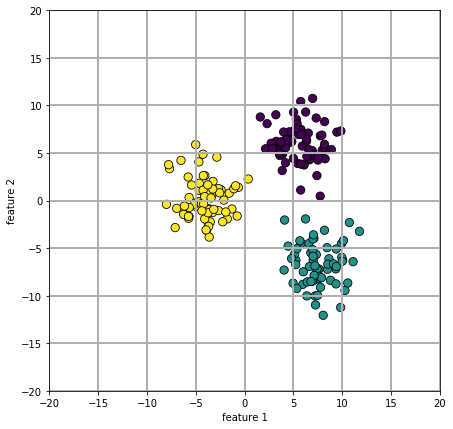

In [7]:
def body(blobs, seed): # an analogue of kmeans
    np.random.seed(seed)
    new_cent = np.array([np.random.randint(blobs[:,:].min(), blobs[:,:].max(), features) for k in range(centers_a)],
                        dtype = np.float64)
    clusters = corresp(blobs, new_cent)
    centers = deepcopy(new_cent)
    new_cent = cent_form(blobs, centers, clusters)
    clusters = corresp(blobs, new_cent)
    while (fin_sign(centers, new_cent) != True):
        centers = deepcopy(new_cent)
        new_cent = cent_form(blobs, centers, clusters)
        clusters = corresp(blobs, new_cent)
    return(clusters)
    
res = body(blobs, seed)
print_fig(blobs, res)

Я реализовывал k-means с 3 кластерами, однако алгоритм в общем сильно зависит от кол-ва кластеров. Это количесиво можно найти, например методом "локтя", который определяет зависимость качества кластеризации от количества кластеров, а его график похож на локоть.

7.88 ms ± 67.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


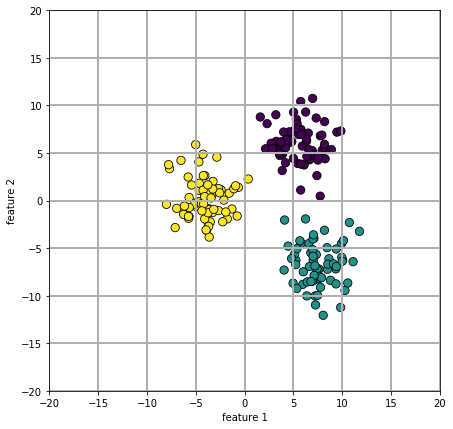

In [8]:
from sklearn.cluster import KMeans
%timeit a = KMeans(n_clusters = clusters, random_state = seed).fit_predict(blobs)
a = KMeans(n_clusters = clusters, random_state = seed).fit_predict(blobs)
print_fig(blobs, a)

Я сравнил качество кластеризации своего KMeans и настоящего.

# Далее я сравню k-means и k-means++ на различных выборках.

7.71 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


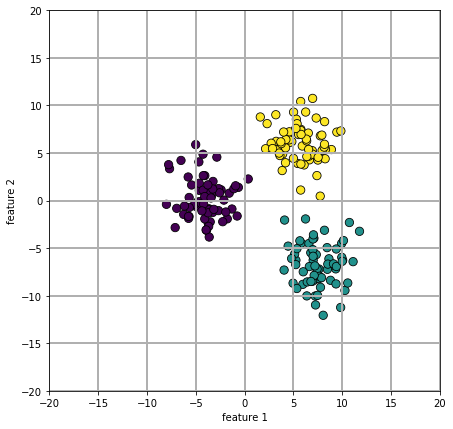

8.87 ms ± 688 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


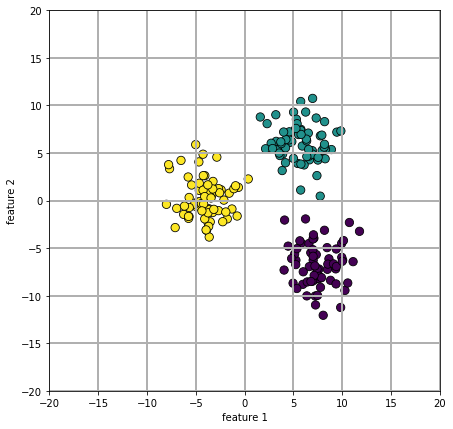

In [9]:
%timeit a = KMeans(n_clusters=3, init='random').fit_predict(blobs)
a = KMeans(n_clusters=3, init='random').fit_predict(blobs)
print_fig(blobs, a)

%timeit b = KMeans(n_clusters=3, init='k-means++').fit_predict(blobs)
b = KMeans(n_clusters=3, init='k-means++').fit_predict(blobs)
print_fig(blobs, b)

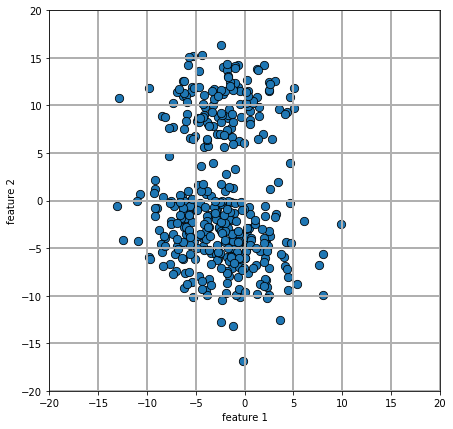

In [10]:
# change seed and blobs_a
seed = 50
np.random.seed(seed)
blobsnew, blob_labels = make_blobs(n_samples=400, n_features=2,
                                centers=3, random_state=seed, cluster_std = 3)
plt.figure(figsize = (7,7))
plt.scatter(blobsnew[:,0], blobsnew[:,1], s = 70,
            edgecolors = 'black', linewidth = 0.8)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid(lw = 2)
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.show()

13.2 ms ± 338 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


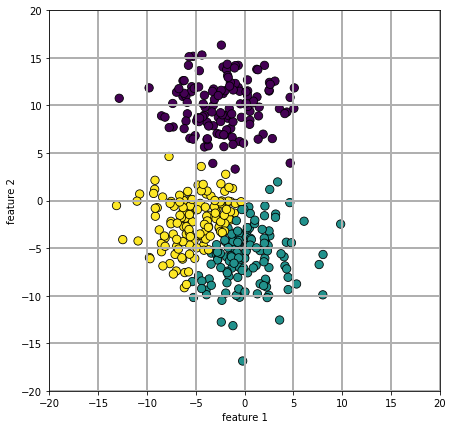

14.8 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


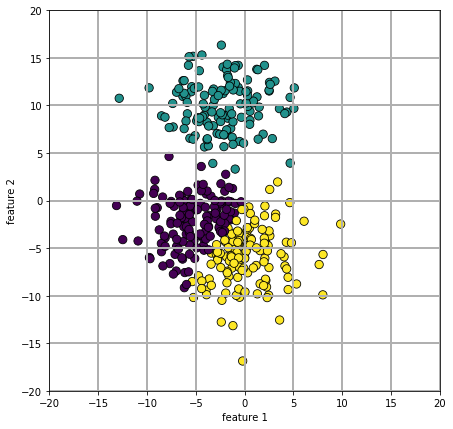

In [11]:
%timeit a = KMeans(n_clusters=3, init='random').fit_predict(blobsnew)
a = KMeans(n_clusters=3, init='random').fit_predict(blobsnew)
print_fig(blobsnew, a)

%timeit b = KMeans(n_clusters=3, init='k-means++').fit_predict(blobsnew)
b = KMeans(n_clusters=3, init='k-means++').fit_predict(blobsnew)
print_fig(blobsnew, b)

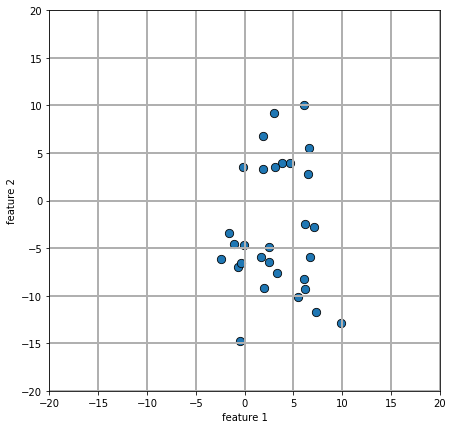

In [12]:
# will change seed again and lower blobs_a
seed = 10
np.random.seed(seed)
blobsnew, blob_labels = make_blobs(n_samples=30, n_features=2,
                                centers=3, random_state=seed, cluster_std = 3)
plt.figure(figsize = (7,7))
plt.scatter(blobsnew[:,0], blobsnew[:,1], s = 70,
            edgecolors = 'black', linewidth = 0.8)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid(lw = 2)
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.show()

5.48 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


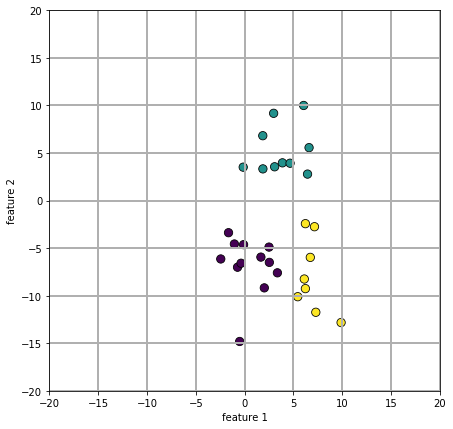

7.76 ms ± 27.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


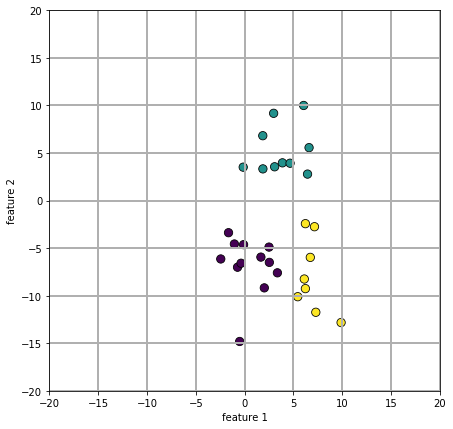

In [13]:
%timeit a = KMeans(n_clusters=3, init='random').fit_predict(blobsnew)
a = KMeans(n_clusters=3, init='random').fit_predict(blobsnew)
print_fig(blobsnew, a)

%timeit b = KMeans(n_clusters=3, init='k-means++').fit_predict(blobsnew)
b = KMeans(n_clusters=3, init='k-means++').fit_predict(blobsnew)
print_fig(blobsnew, b)

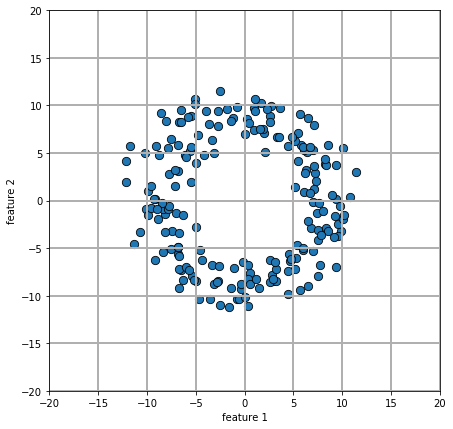

9.7 ms ± 80.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


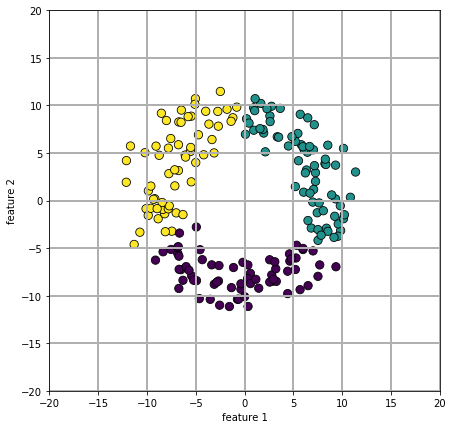

11.9 ms ± 86.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


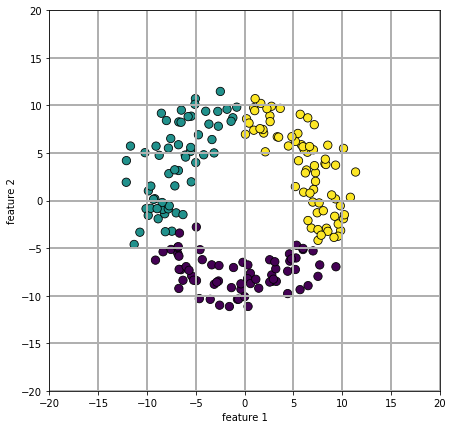

In [14]:
from sklearn.datasets import make_circles

circles, circles_labels = make_circles(n_samples = 200, noise = 0.1)
circles *= 10

plt.figure(figsize = (7,7))
plt.scatter(circles[:,0], circles[:,1], s = 70,
            edgecolors = 'black', linewidth = 0.8)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid(lw = 2)
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.show()

%timeit a = KMeans(n_clusters=3, init='random').fit_predict(circles)
a = KMeans(n_clusters=3, init='random').fit_predict(circles)
print_fig(circles, a)

%timeit b = KMeans(n_clusters=3, init='k-means++').fit_predict(circles)
b = KMeans(n_clusters=3, init='k-means++').fit_predict(circles)
print_fig(circles, b)

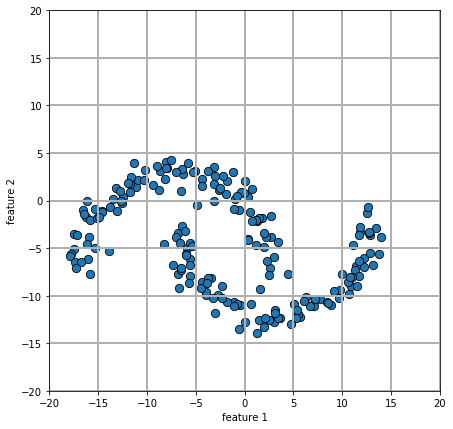

11.4 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


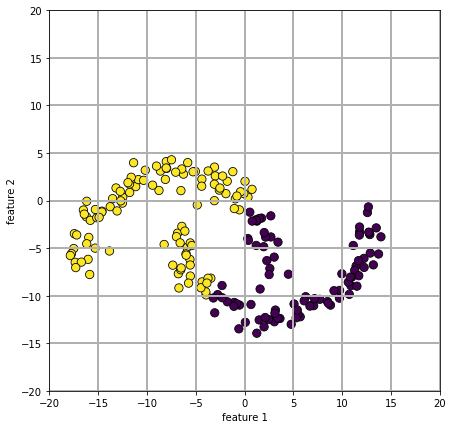

12.4 ms ± 94.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


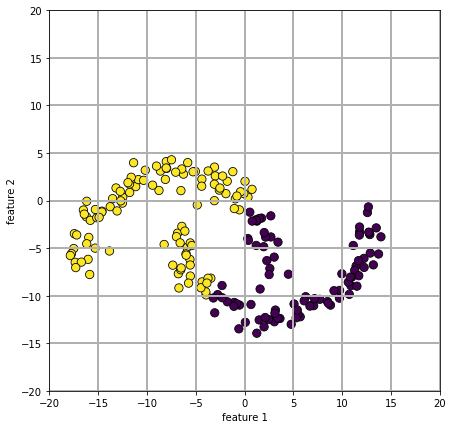

In [15]:
from sklearn.datasets import make_moons

moons, moons_labels = make_moons(n_samples = 200, noise = 0.1)
moons *= 10
moons -=7

plt.figure(figsize = (7,7))
plt.scatter(moons[:,0], moons[:,1], s = 70,
            edgecolors = 'black', linewidth = 0.8)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid(lw = 2)
plt.xlim([-20, 20])
plt.ylim([-20, 20])
plt.show()

%timeit a = KMeans(n_clusters=2, init='random').fit_predict(moons)
a = KMeans(n_clusters=2, init='random').fit_predict(moons)
print_fig(moons, a)

%timeit b = KMeans(n_clusters=2, init='k-means++').fit_predict(moons)
b = KMeans(n_clusters=2, init='k-means++').fit_predict(moons)
print_fig(moons, b)

Из приведённых примеров видно, что между k-means и k-means++ разницы в скорости и сходимости особо нет, однако k-means может сойтись в локальный минимум в отличие от k-means++.

# Пример ошибочной кластеризации:

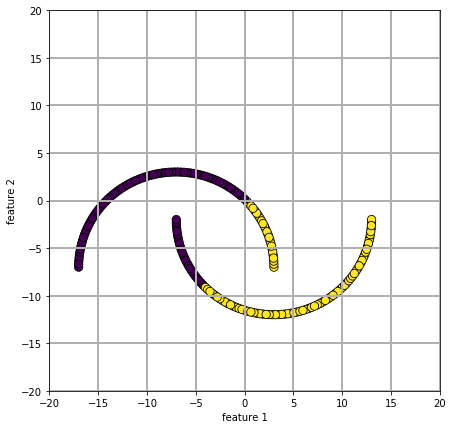

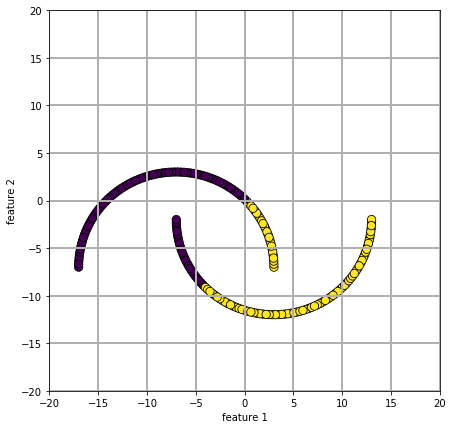

In [16]:
moons, moons_labels = make_moons(n_samples = 200)
moons *= 10
moons -=7

a = KMeans(n_clusters=2, init='random').fit_predict(moons)
print_fig(moons, a)

b = KMeans(n_clusters=2, init='k-means++').fit_predict(moons)
print_fig(moons, b)

Кластеризация неверна, так как центры пересчитываются на центры масс кластеров.

# Скорость в зависимости от объёма данных:

In [17]:
for i in range(10000, 15000, 1000):
    print("\n" + str(i) + " samples:")
    blobsnew, blobs_labels = make_blobs(n_samples = i,
                                 n_features = 2, centers = 10,
                                 random_state = 23)
    %timeit a = KMeans(n_clusters=3, init='random').fit_predict(blobsnew)
    %timeit b = KMeans(n_clusters=3, init='k-means++').fit_predict(blobsnew)


10000 samples:
49.5 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
49.3 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

11000 samples:
52.8 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
56.4 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

12000 samples:
57.7 ms ± 2.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
61.5 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

13000 samples:
62.2 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
68.3 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

14000 samples:
65.5 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
92.4 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Вывод:

K-means довольно эффективен при простоте реализации, однако он сильно зависит от начальных условий и  может сходиться к локальному минимуму.